In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
df = pd.read_excel("maliciousornot.xlsx")

In [13]:
df.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [15]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [16]:
df.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<Axes: xlabel='Type', ylabel='count'>

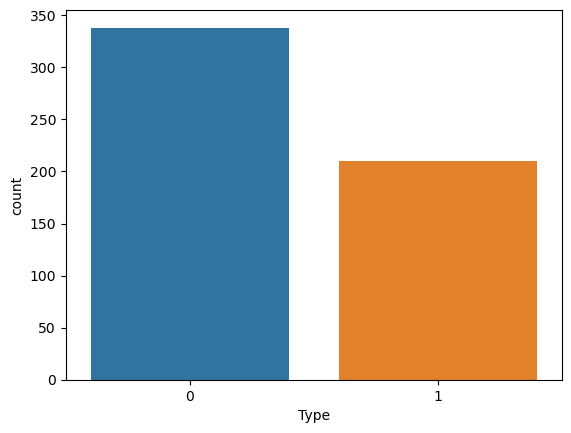

In [17]:
sbn.countplot(x="Type",data=df)

<Axes: >

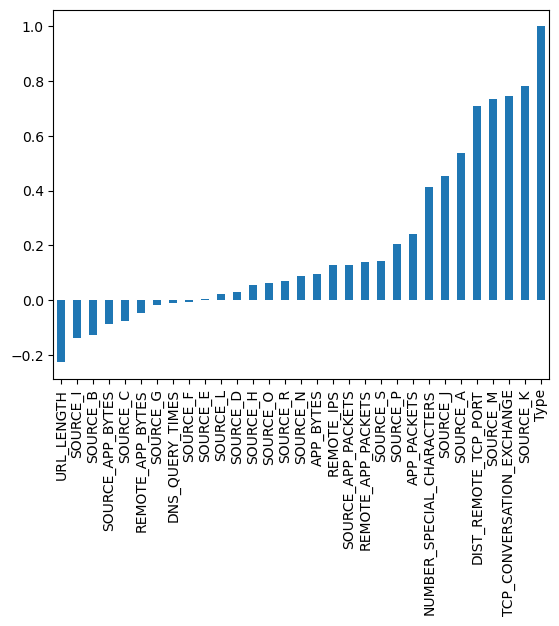

In [18]:
df.corr()["Type"].sort_values().plot(kind=("bar"))

In [19]:
y = df["Type"].values
x = df.drop("Type",axis = 1).values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(x_train)

MinMaxScaler()

In [23]:
x_train = scaler.transform(x_train)

In [24]:
x_test = scaler.transform(x_test)

In [25]:
x_train.shape

(383, 30)

In [26]:
model = Sequential()

model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam")

In [27]:
model.fit(x=x_train, y=y_train, epochs=700, validation_data=(x_test,y_test), verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 18ms/step - loss: 0.6911 - val_loss: 0.6858
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6807 - val_loss: 0.6789
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6705 - val_loss: 0.6693
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6571 - val_loss: 0.6555
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6384 - val_loss: 0.6345
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6114 - val_loss: 0.6027
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5773 - val_loss: 0.5770
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5356 - val_loss: 0.5324
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4910 - val_loss: 0.4943
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4434 - val_loss: 0.4589
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.0649 - val_loss: 0.1994
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0651 - val_loss: 0.2114
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0702 - val_loss: 0.2101
Epoch 86/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0671 - val_loss: 0.1932
Epoch 87/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0649 - val_loss: 0.2038
Epoch 88/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0622 - val_loss: 0.1946
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0627 - val_loss: 0.1902
Epoch 90/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0624 - val_loss: 0.1969
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0613 - val_loss: 0.1897
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0603 - val_loss: 0.1965
Epoch 93/700


12/12 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.1519
Epoch 165/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.1533
Epoch 166/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0370 - val_loss: 0.1513
Epoch 167/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.1546
Epoch 168/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1535
Epoch 169/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0380 - val_loss: 0.1537
Epoch 170/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0362 - val_loss: 0.1528
Epoch 171/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.1532
Epoch 172/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.1515
Epoch 173/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.1568
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0289 - val_loss: 0.1726
Epoch 246/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.1727
Epoch 247/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0277 - val_loss: 0.1718
Epoch 248/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.1740
Epoch 249/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.1817
Epoch 250/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0297 - val_loss: 0.1742
Epoch 251/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.1898
Epoch 252/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.1745
Epoch 253/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.1759
Epoch 254/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.1778
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.2121
Epoch 327/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.2130
Epoch 328/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.2134
Epoch 329/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2092
Epoch 330/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0258 - val_loss: 0.2107
Epoch 331/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.2105
Epoch 332/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.2111
Epoch 333/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.2153
Epoch 334/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0267 - val_loss: 0.2117
Epoch 335/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0279 - val_loss: 0.2210
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.2453
Epoch 408/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.2617
Epoch 409/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0257 - val_loss: 0.2449
Epoch 410/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.2428
Epoch 411/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.2417
Epoch 412/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0246 - val_loss: 0.2404
Epoch 413/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.2516
Epoch 414/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.2503
Epoch 415/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.2545
Epoch 416/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.2453
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.2767
Epoch 489/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.2788
Epoch 490/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.2726
Epoch 491/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0196 - val_loss: 0.2831
Epoch 492/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0208 - val_loss: 0.2759
Epoch 493/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.2728
Epoch 494/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2764
Epoch 495/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.2731
Epoch 496/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.2790
Epoch 497/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.2756
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.3362
Epoch 570/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.3278
Epoch 571/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.3276
Epoch 572/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.3339
Epoch 573/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.3291
Epoch 574/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.3647
Epoch 575/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 0.3318
Epoch 576/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.3381
Epoch 577/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.3356
Epoch 578/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.3448
Epoc

12/12 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.4056
Epoch 651/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.4000
Epoch 652/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0117 - val_loss: 0.3967
Epoch 653/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.3983
Epoch 654/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.4090
Epoch 655/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.3930
Epoch 656/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.4021
Epoch 657/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.4096
Epoch 658/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0097 - val_loss: 0.4015
Epoch 659/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.3952
Epoc

In [28]:
model.history.history

{'loss': [0.6911364793777466,
  0.6807438731193542,
  0.6705362796783447,
  0.6571202874183655,
  0.638433575630188,
  0.6114383339881897,
  0.5772811770439148,
  0.5355769395828247,
  0.4909752905368805,
  0.4434458315372467,
  0.39576098322868347,
  0.35115715861320496,
  0.31177422404289246,
  0.2786588668823242,
  0.25683221220970154,
  0.23445993661880493,
  0.21886232495307922,
  0.20316924154758453,
  0.19413483142852783,
  0.1810247302055359,
  0.1727566421031952,
  0.16439886391162872,
  0.15982046723365784,
  0.15313895046710968,
  0.14799630641937256,
  0.1427437961101532,
  0.1375521421432495,
  0.13476641476154327,
  0.12975482642650604,
  0.1322420835494995,
  0.12483490258455276,
  0.12310988456010818,
  0.12000378221273422,
  0.12004491686820984,
  0.11671070009469986,
  0.1106942892074585,
  0.11458718031644821,
  0.1076357290148735,
  0.10478734225034714,
  0.10256437212228775,
  0.1034754291176796,
  0.10399210453033447,
  0.1006680279970169,
  0.09950195252895355,
 

In [29]:
KayipVeri = pd.DataFrame(model.history.history)

<Axes: >

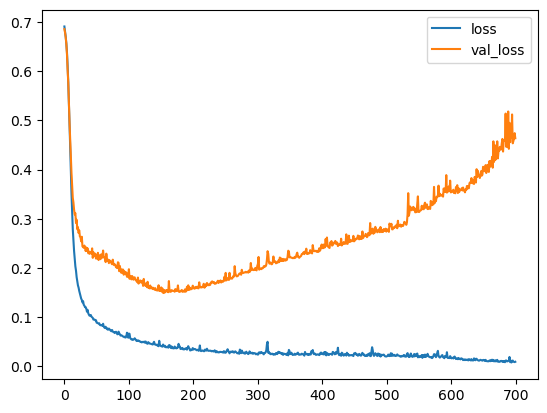

In [30]:
KayipVeri.plot()

In [31]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [32]:
Stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [33]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test), verbose=1, callbacks=[Stop])

Epoch 1/700
12/12 [==============================] - 1s 12ms/step - loss: 0.6900 - val_loss: 0.6877
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6732 - val_loss: 0.6786
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6559 - val_loss: 0.6661
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6323 - val_loss: 0.6475
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6018 - val_loss: 0.6158
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5604 - val_loss: 0.5818
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5073 - val_loss: 0.5260
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4493 - val_loss: 0.4738
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3923 - val_loss: 0.4306
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3468 - val_loss: 0.3949
Epoch 11

In [34]:
KayipVeri = pd.DataFrame(model.history.history)

<Axes: >

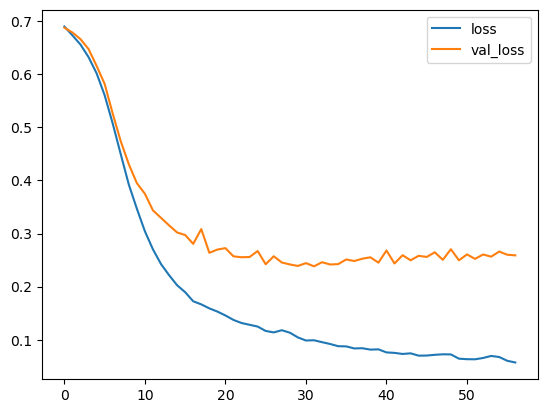

In [35]:
KayipVeri.plot()

In [36]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [37]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[Stop])

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.6991 - val_loss: 0.6860
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6951 - val_loss: 0.6839
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6960 - val_loss: 0.6833
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6801 - val_loss: 0.6825
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6798 - val_loss: 0.6815
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6677 - val_loss: 0.6803
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6646 - val_loss: 0.6777
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6547 - val_loss: 0.6748
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6631 - val_loss: 0.6714
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6696 - val_loss: 0.6681
Epoch 11

12/12 [==============================] - 0s 4ms/step - loss: 0.2638 - val_loss: 0.2831
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2616 - val_loss: 0.2869
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2612 - val_loss: 0.2878
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2996 - val_loss: 0.2671
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2507 - val_loss: 0.2611
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2667 - val_loss: 0.2658
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2719 - val_loss: 0.2622
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2414 - val_loss: 0.2637
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2394 - val_loss: 0.2766
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2606 - val_loss: 0.2665
Epoch 93/700


In [38]:
KayipVeri = pd.DataFrame(model.history.history)

<Axes: >

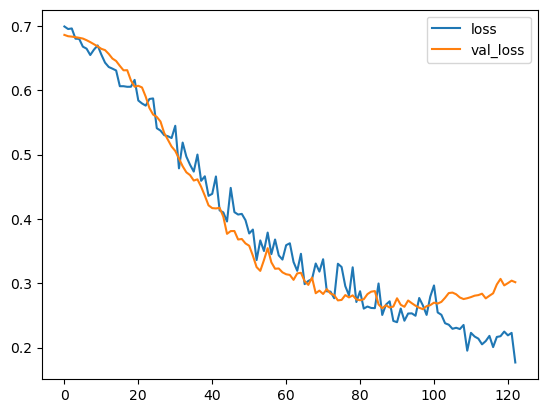

In [39]:
KayipVeri.plot()

In [43]:
tahminler = model.predict(x_test > 0.5).astype("int32")

6/6 [==============================] - 0s 2ms/step


In [44]:
tahminler

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [46]:
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        91
           1       1.00      0.07      0.13        74

    accuracy                           0.58       165
   macro avg       0.78      0.53      0.43       165
weighted avg       0.76      0.58      0.46       165



In [47]:
print(confusion_matrix(y_test,tahminler))

[[91  0]
 [69  5]]


In [48]:
#%58 doğruluk